=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,INFY.NS
Date,
2020-06-01,622.146423
2020-06-02,629.750488
2020-06-03,623.925171
2020-06-04,629.439209
2020-06-05,625.703857


Training LSTM model...
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1167 - val_loss: 0.0043
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 12/100
30/30 ━━━━━━━━━━

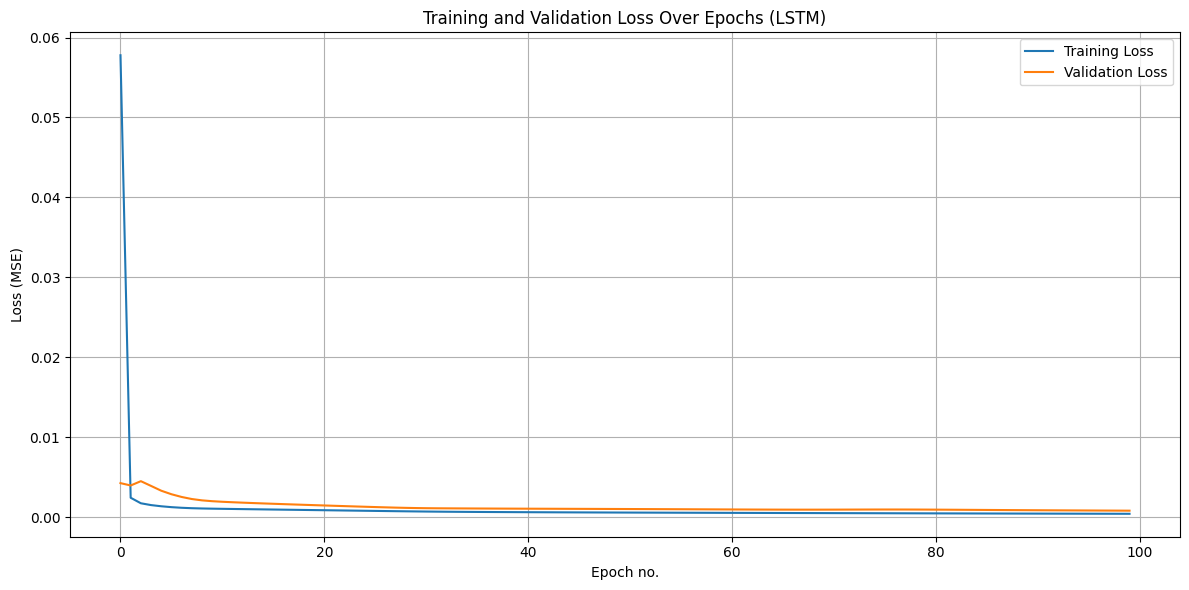


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000428
RL Epoch 2/100, Average Loss per Batch: 0.000445
RL Epoch 3/100, Average Loss per Batch: 0.000428
RL Epoch 4/100, Average Loss per Batch: 0.000420
RL Epoch 5/100, Average Loss per Batch: 0.000420
RL Epoch 6/100, Average Loss per Batch: 0.000418
RL Epoch 7/100, Average Loss per Batch: 0.000417
RL Epoch 8/100, Average Loss per Batch: 0.000416
RL Epoch 9/100, Average Loss per Batch: 0.000414
RL Epoch 10/100, Average Loss per Batch: 0.000413
RL Epoch 11/100, Average Loss per Batch: 0.000412
RL Epoch 12/100, Average Loss per Batch: 0.000411
RL Epoch 13/100, Average Loss per Batch: 0.000409
RL Epoch 14/100, Average Loss per Batch: 0.000408
RL Epoch 15/100, Average Loss per Batch: 0.000407
RL Epoch 16/100, Average Loss per Batch: 0.000406
RL Epoch 17/100, Average Loss per Batch: 0.000404
RL Epoch 18/100, Average Loss per Batch: 0.000403
RL Epoch 19/100, Average Loss per Batch: 0.000

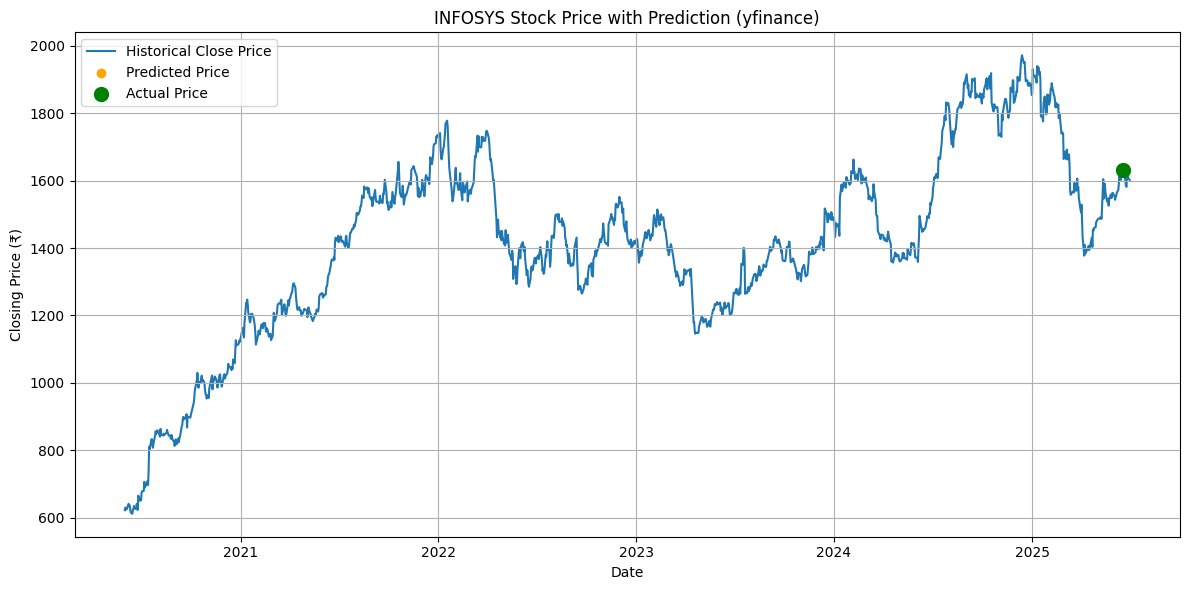


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹15.33
 Mean Squared Error (MSE)  : ₹371.92
 Root Squared Error (RMSE) : ₹19.29
 R² Score                  : 0.5638
 Mean Absolute Percentage Error (MAPE) : 0.96%
 Accuracy (100 - MAPE) : 99.04%
 MSE Percentage of Average Price: 23.30%
 MAE Percentage of Average Price: 0.96%


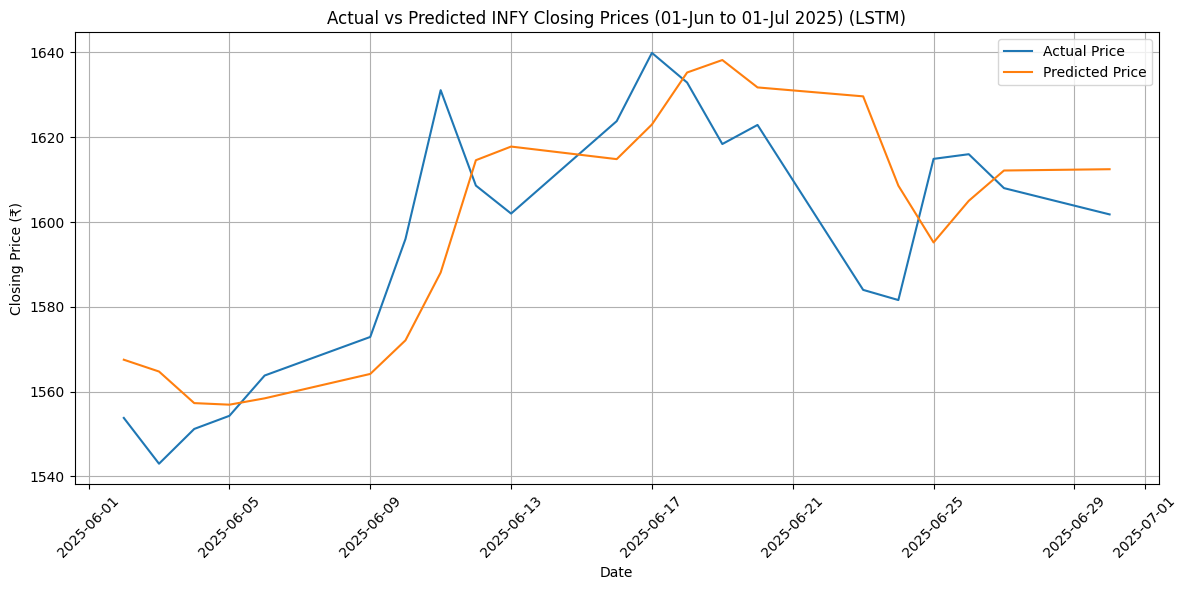

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)
    display(full_df.head())
    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training LSTM model...
Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3829 - val_loss: 0.0546
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.0146
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - val_loss: 0.0099
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0076
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0059
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0053
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━

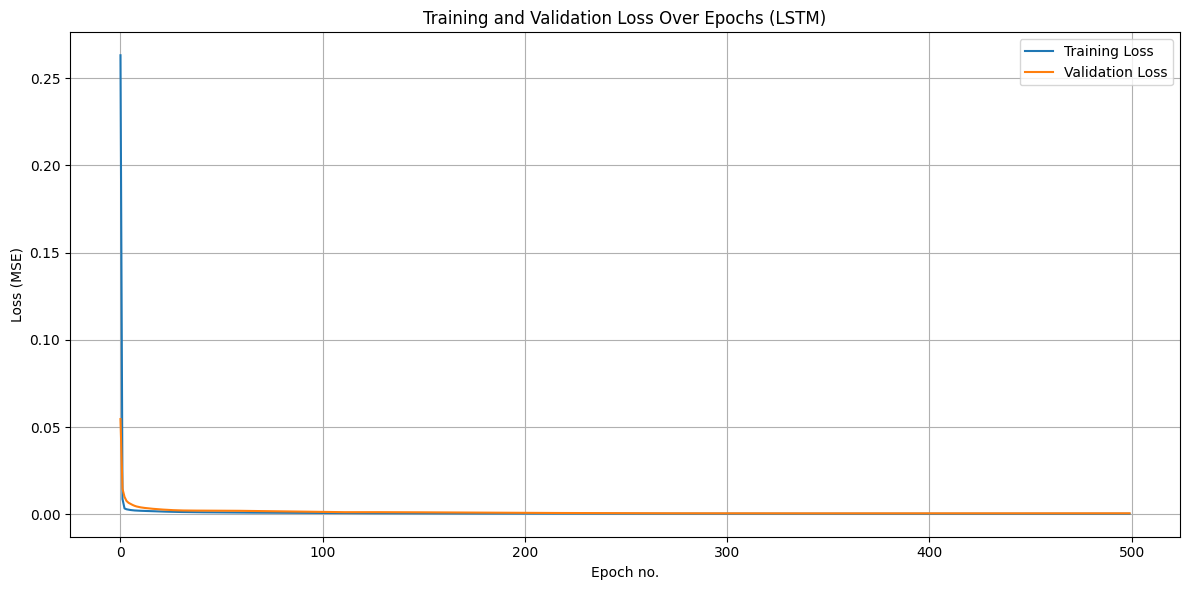


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000246
RL Epoch 2/100, Average Loss per Batch: 0.000252
RL Epoch 3/100, Average Loss per Batch: 0.000239
RL Epoch 4/100, Average Loss per Batch: 0.000241
RL Epoch 5/100, Average Loss per Batch: 0.000240
RL Epoch 6/100, Average Loss per Batch: 0.000238
RL Epoch 7/100, Average Loss per Batch: 0.000240
RL Epoch 8/100, Average Loss per Batch: 0.000239
RL Epoch 9/100, Average Loss per Batch: 0.000238
RL Epoch 10/100, Average Loss per Batch: 0.000239
RL Epoch 11/100, Average Loss per Batch: 0.000239
RL Epoch 12/100, Average Loss per Batch: 0.000239
RL Epoch 13/100, Average Loss per Batch: 0.000239
RL Epoch 14/100, Average Loss per Batch: 0.000239
RL Epoch 15/100, Average Loss per Batch: 0.000239
RL Epoch 16/100, Average Loss per Batch: 0.000239
RL Epoch 17/100, Average Loss per Batch: 0.000239
RL Epoch 18/100, Average Loss per Batch: 0.000239
RL Epoch 19/100, Average Loss per Batch: 0.000

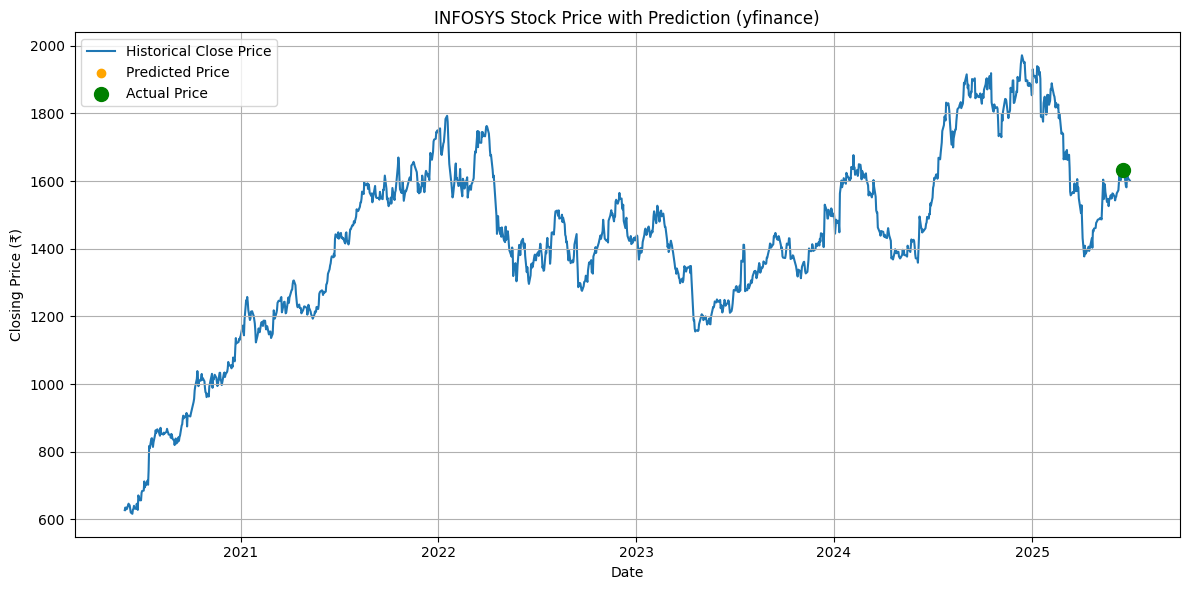


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹14.74
 Mean Squared Error (MSE)  : ₹342.50
 Root Squared Error (RMSE) : ₹18.51
 R² Score                  : 0.5983
 Mean Absolute Percentage Error (MAPE) : 0.92%
 Accuracy (100 - MAPE) : 99.08%
 MSE Percentage of Average Price: 21.46%
 MAE Percentage of Average Price: 0.92%


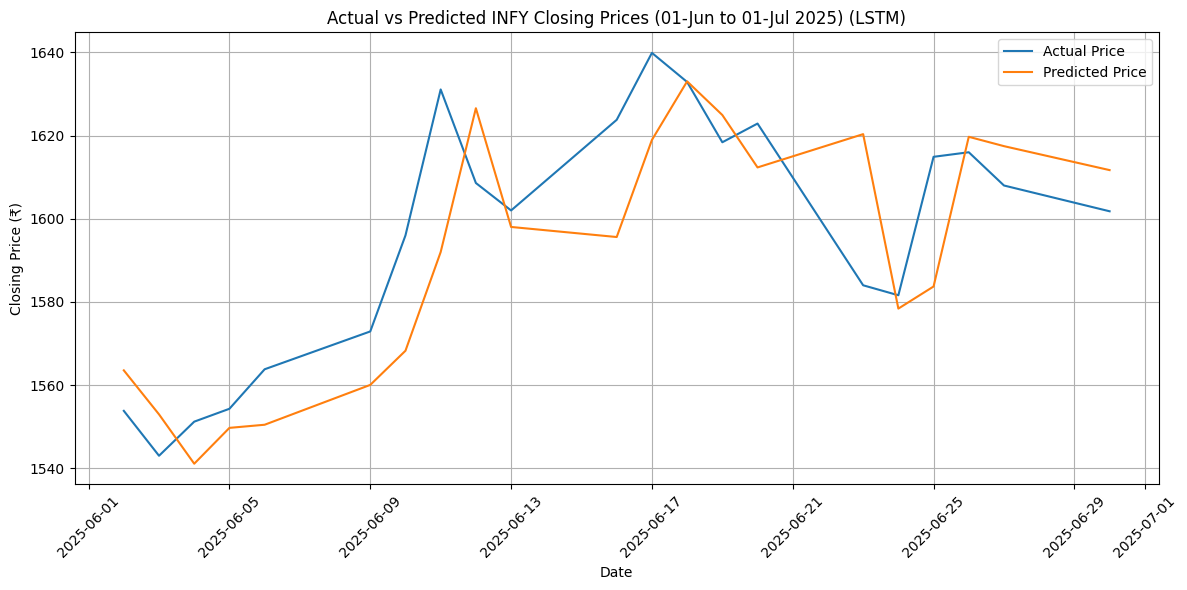

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training LSTM model...
Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.2681 - val_loss: 0.0039
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 0.0073
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 0.0054
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 9/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 10/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 11/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/1000
30/3

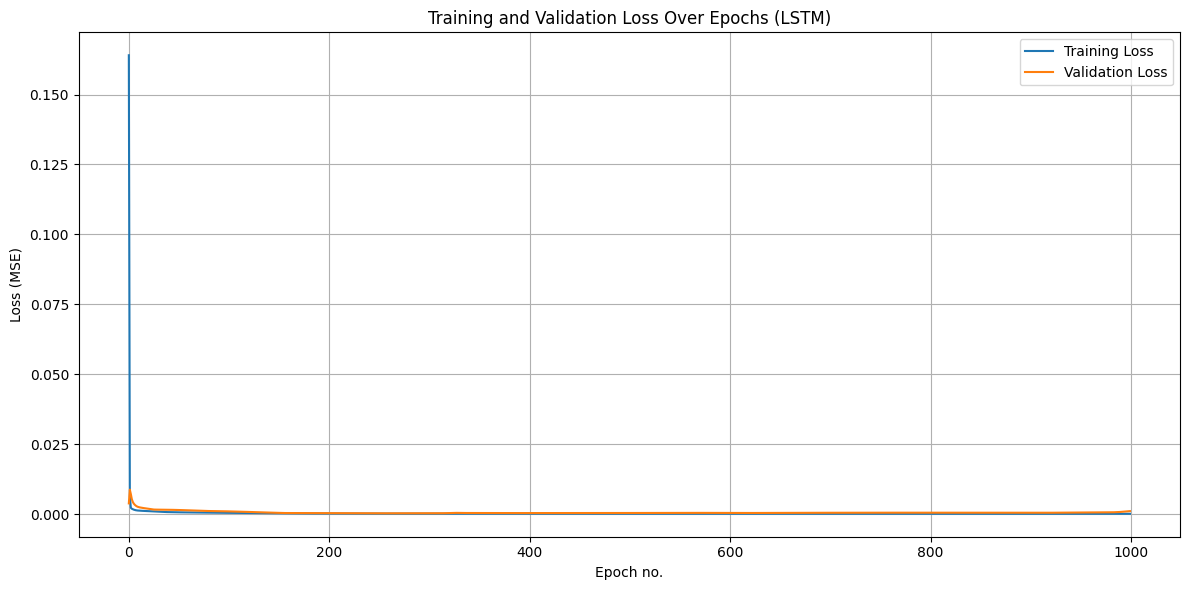


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000228
RL Epoch 2/100, Average Loss per Batch: 0.000222
RL Epoch 3/100, Average Loss per Batch: 0.000220
RL Epoch 4/100, Average Loss per Batch: 0.000220
RL Epoch 5/100, Average Loss per Batch: 0.000219
RL Epoch 6/100, Average Loss per Batch: 0.000223
RL Epoch 7/100, Average Loss per Batch: 0.000223
RL Epoch 8/100, Average Loss per Batch: 0.000229
RL Epoch 9/100, Average Loss per Batch: 0.000221
RL Epoch 10/100, Average Loss per Batch: 0.000221
RL Epoch 11/100, Average Loss per Batch: 0.000219
RL Epoch 12/100, Average Loss per Batch: 0.000221
RL Epoch 13/100, Average Loss per Batch: 0.000219
RL Epoch 14/100, Average Loss per Batch: 0.000224
RL Epoch 15/100, Average Loss per Batch: 0.000222
RL Epoch 16/100, Average Loss per Batch: 0.000224
RL Epoch 17/100, Average Loss per Batch: 0.000219
RL Epoch 18/100, Average Loss per Batch: 0.000223
RL Epoch 19/100, Average Loss per Batch: 0.000

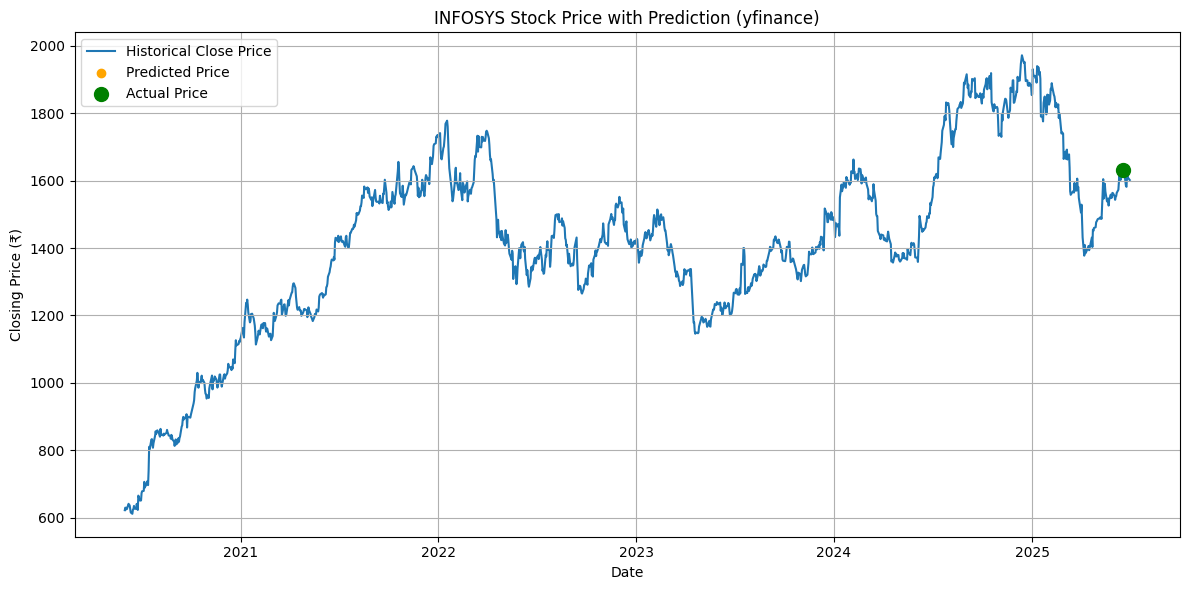


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹14.33
 Mean Squared Error (MSE)  : ₹355.10
 Root Squared Error (RMSE) : ₹18.84
 R² Score                  : 0.5835
 Mean Absolute Percentage Error (MAPE) : 0.89%
 Accuracy (100 - MAPE) : 99.11%
 MSE Percentage of Average Price: 22.25%
 MAE Percentage of Average Price: 0.90%


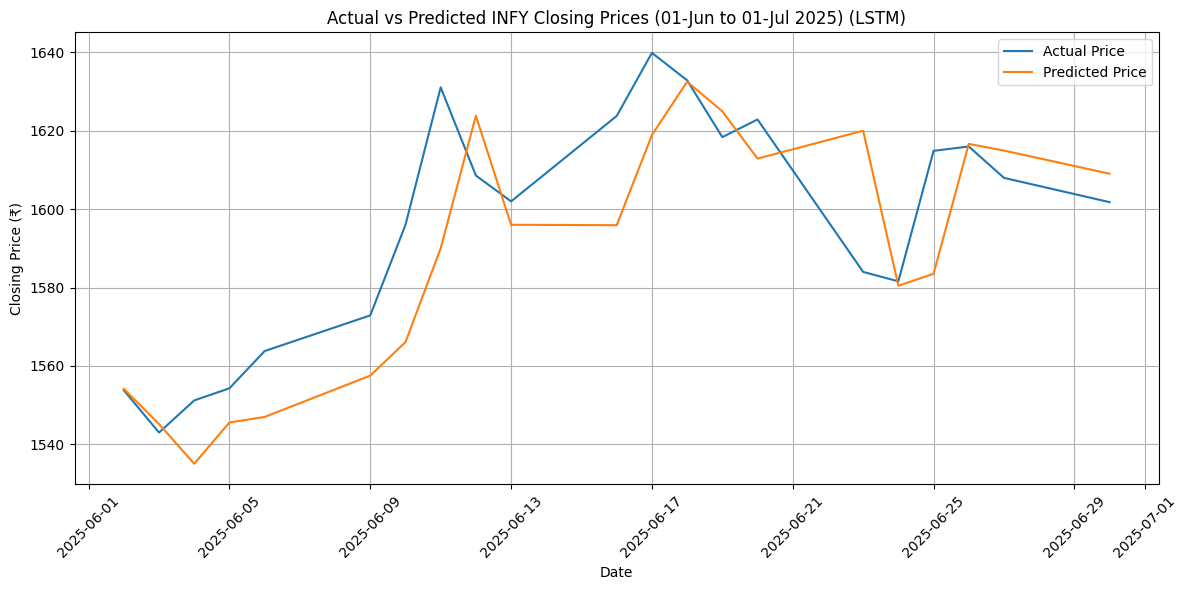

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed

Training LSTM model...
Epoch 1/5000


Streaming output truncated to the last 5000 lines.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.9079e-04 - val_loss: 0.0015
Epoch 2502/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.9201e-04 - val_loss: 0.0015
Epoch 2503/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.9189e-04 - val_loss: 0.0015
Epoch 2504/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.9017e-04 - val_loss: 0.0015
Epoch 2505/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.8876e-04 - val_loss: 0.0015
Epoch 2506/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.8980e-04 - val_loss: 0.0015
Epoch 2507/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.9141e-04 - val_loss: 0.0015
Epoch 2508/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.9004e-04 - val_loss: 0.0016
Epoch 2509/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8945e-04 - val_loss: 0.0015
Epoch 2510/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8853e-04 - val_loss: 0.0015
Epoch 2511/5000
15/15 ━━━

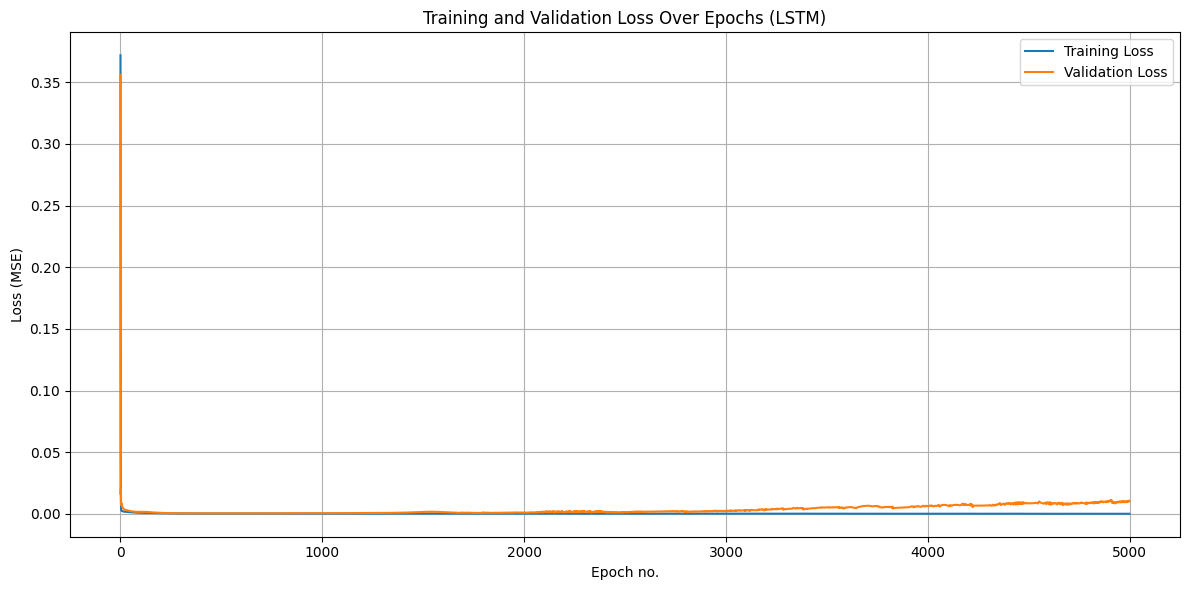


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000087
RL Epoch 2/100, Average Loss per Batch: 0.000123
RL Epoch 3/100, Average Loss per Batch: 0.000091
RL Epoch 4/100, Average Loss per Batch: 0.000071
RL Epoch 5/100, Average Loss per Batch: 0.000072
RL Epoch 6/100, Average Loss per Batch: 0.000075
RL Epoch 7/100, Average Loss per Batch: 0.000092
RL Epoch 8/100, Average Loss per Batch: 0.000120
RL Epoch 9/100, Average Loss per Batch: 0.000157
RL Epoch 10/100, Average Loss per Batch: 0.000163
RL Epoch 11/100, Average Loss per Batch: 0.000138
RL Epoch 12/100, Average Loss per Batch: 0.000102
RL Epoch 13/100, Average Loss per Batch: 0.000084
RL Epoch 14/100, Average Loss per Batch: 0.000071
RL Epoch 15/100, Average Loss per Batch: 0.000065
RL Epoch 16/100, Average Loss per Batch: 0.000061
RL Epoch 17/100, Average Loss per Batch: 0.000061
RL Epoch 18/100, Average Loss per Batch: 0.000061
RL Epoch 19/100, Average Loss per Batch: 0.000

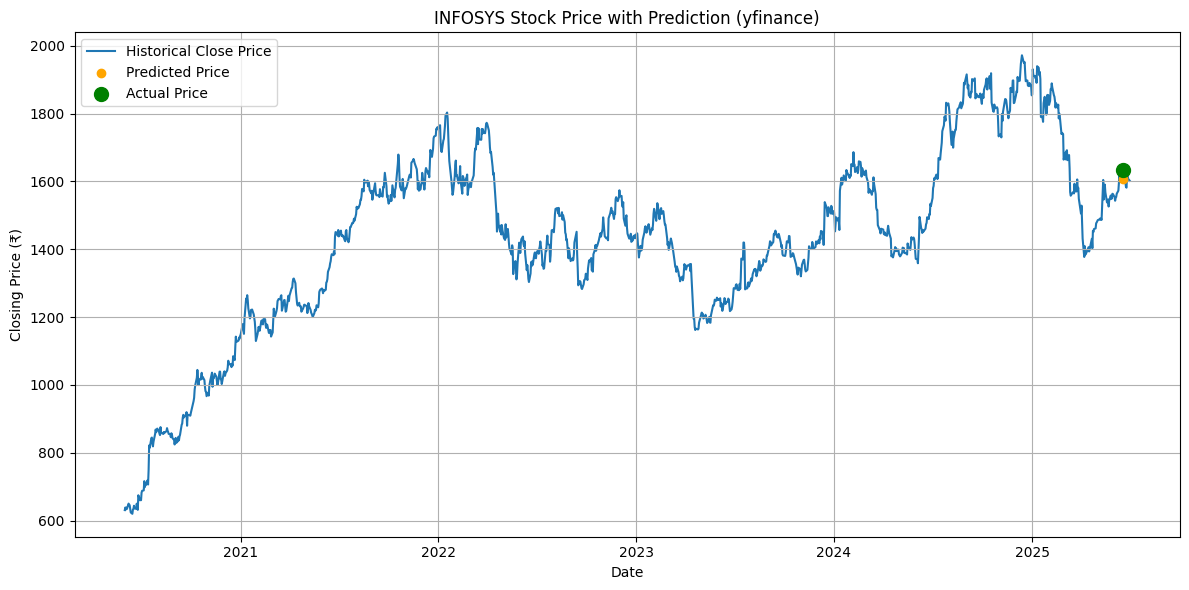


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹28.36
 Mean Squared Error (MSE)  : ₹1122.06
 Root Squared Error (RMSE) : ₹33.50
 R² Score                  : -0.3160
 Mean Absolute Percentage Error (MAPE) : 1.78%
 Accuracy (100 - MAPE) : 98.22%
 MSE Percentage of Average Price: 70.29%
 MAE Percentage of Average Price: 1.78%


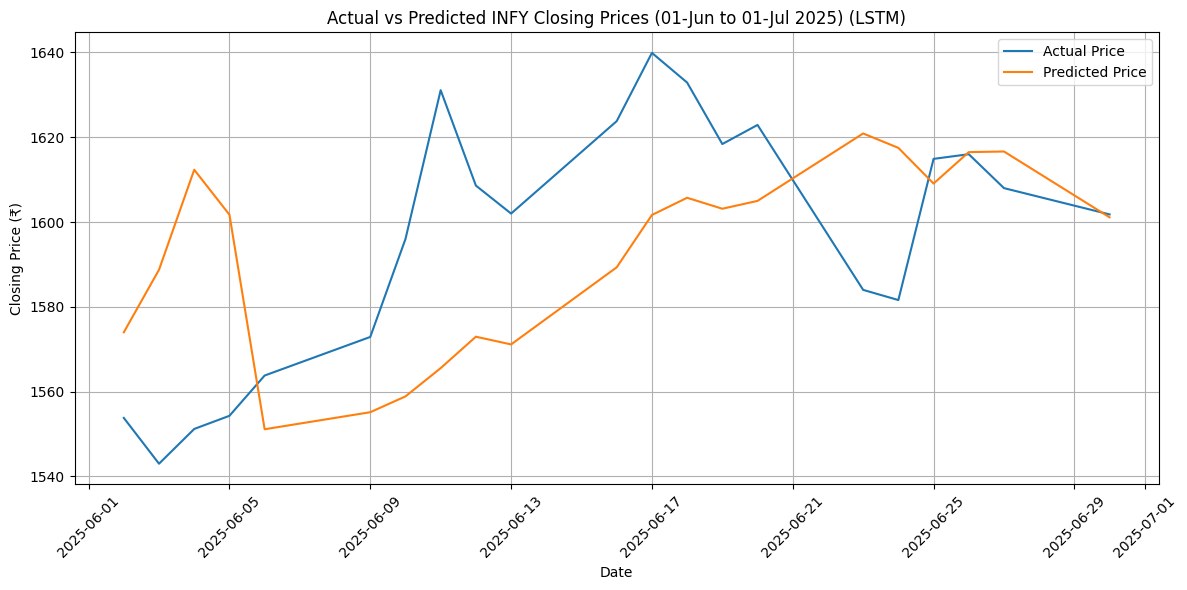

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training LSTM model...
Epoch 1/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.2737 - val_loss: 0.2146
Epoch 2/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0557 - val_loss: 0.0154
Epoch 3/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0101 - val_loss: 0.0133
Epoch 4/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 5/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 6/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 7/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 8/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 9/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 10/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 11/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 12/2000
15/1

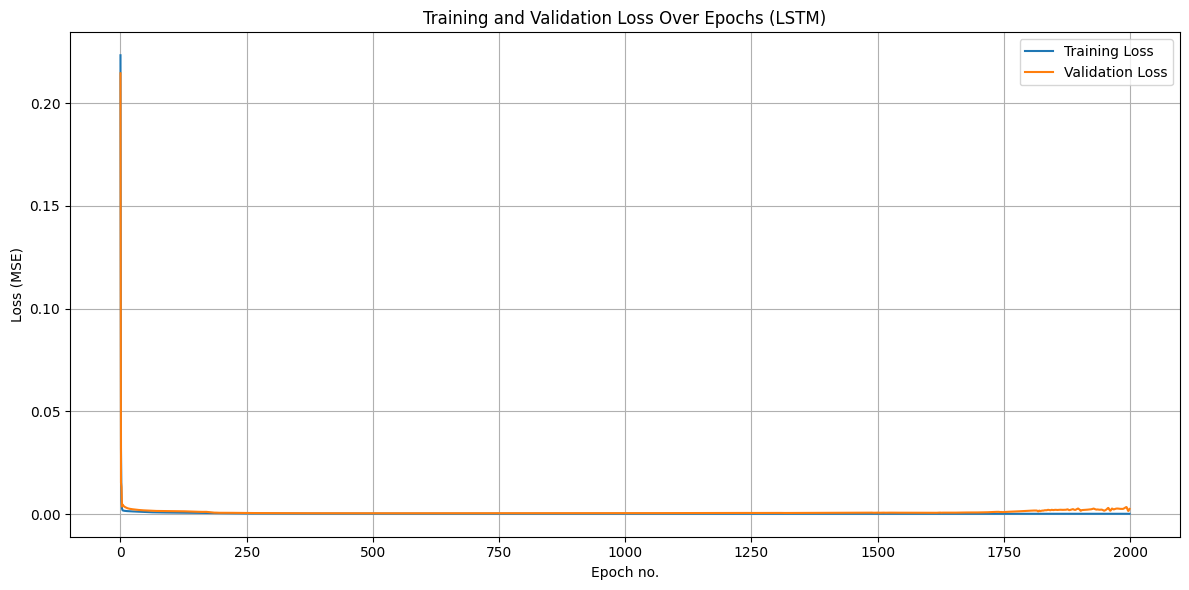


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000203
RL Epoch 2/100, Average Loss per Batch: 0.000205
RL Epoch 3/100, Average Loss per Batch: 0.000202
RL Epoch 4/100, Average Loss per Batch: 0.000206
RL Epoch 5/100, Average Loss per Batch: 0.000218
RL Epoch 6/100, Average Loss per Batch: 0.000205
RL Epoch 7/100, Average Loss per Batch: 0.000212
RL Epoch 8/100, Average Loss per Batch: 0.000216
RL Epoch 9/100, Average Loss per Batch: 0.000201
RL Epoch 10/100, Average Loss per Batch: 0.000199
RL Epoch 11/100, Average Loss per Batch: 0.000200
RL Epoch 12/100, Average Loss per Batch: 0.000202
RL Epoch 13/100, Average Loss per Batch: 0.000207
RL Epoch 14/100, Average Loss per Batch: 0.000200
RL Epoch 15/100, Average Loss per Batch: 0.000206
RL Epoch 16/100, Average Loss per Batch: 0.000216
RL Epoch 17/100, Average Loss per Batch: 0.000238
RL Epoch 18/100, Average Loss per Batch: 0.000236
RL Epoch 19/100, Average Loss per Batch: 0.000

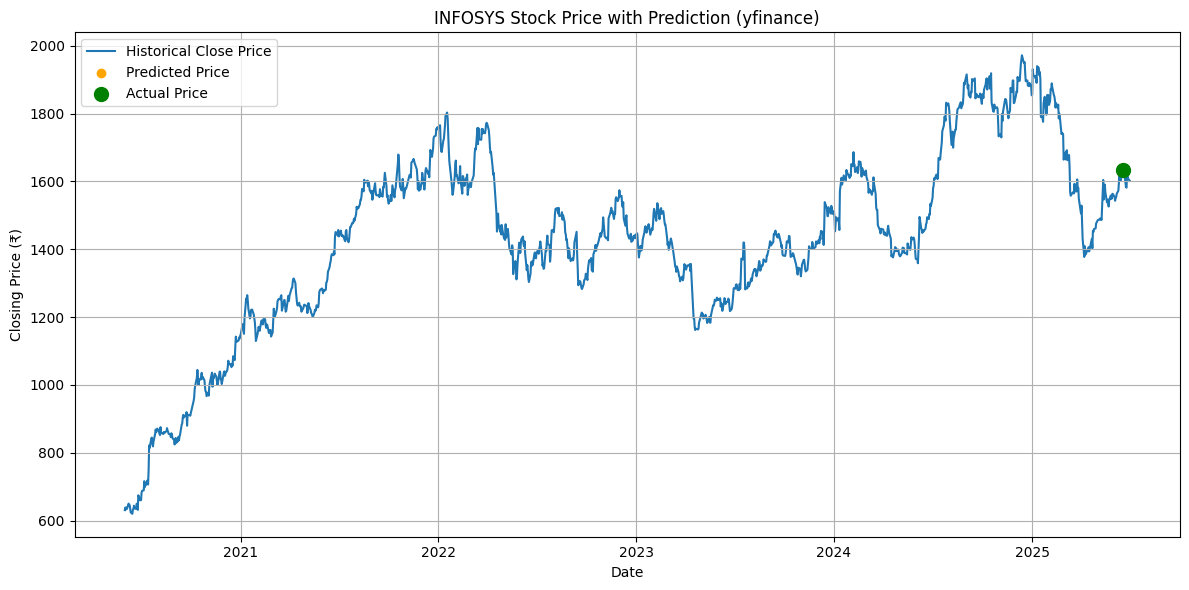


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹15.29
 Mean Squared Error (MSE)  : ₹362.98
 Root Squared Error (RMSE) : ₹19.05
 R² Score                  : 0.5743
 Mean Absolute Percentage Error (MAPE) : 0.96%
 Accuracy (100 - MAPE) : 99.04%
 MSE Percentage of Average Price: 22.74%
 MAE Percentage of Average Price: 0.96%


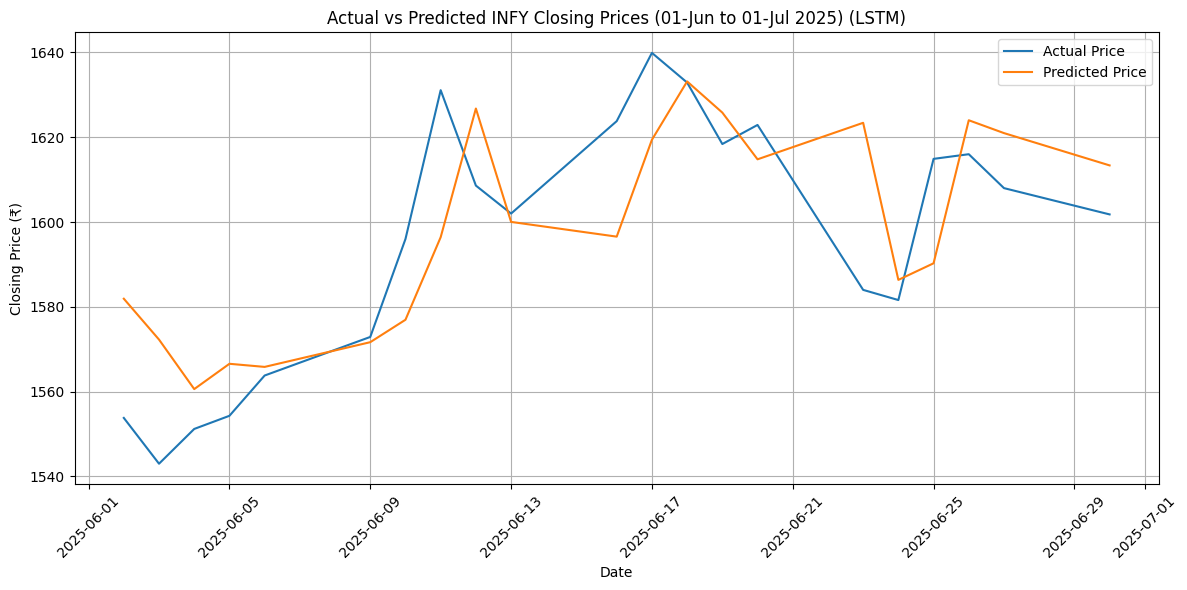

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()